In [2]:
import re
import csv
import string
import math

import numpy as np
import pandas as pd
import scipy.stats as stats

In [5]:
data = pd.read_csv("/kaggle/input/tweet-data/labeled_data.csv")

# Clean the tweet text

In [6]:
!pip install tweet-preprocessor

In [7]:
import preprocessor as p

The dataset used for this project is obtained from the [Davidson et al. 2017](http://https://ojs.aaai.org/index.php/ICWSM/article/view/14955) paper. Their GitHub repo can be found [here](http://https://github.com/t-davidson/hate-speech-and-offensive-language). 

In [8]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
# Remove url, emojis, mentions, numbers, and not hashtags
# p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.MENTION)
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.MENTION, p.OPT.NUMBER)

In [10]:
# Remove HTML codes for emojis
def remove_emojis(text_string) : 
#     emoji_regex = '&#[0-9]+;'
    emoji_regex = '&#\S*'
    parsed_text = re.sub(emoji_regex, "", text_string)
    return parsed_text

In [11]:
data['clean_tweet'] = data['tweet'].apply(remove_emojis)
data['clean_tweet'] = data['clean_tweet'].apply(p.clean)

In [12]:
data['clean_tweet'][0]

"!!! RT : As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [13]:
data['clean_tweet'].isnull().sum()

0

In [14]:
# Add label column 
data['label'] = data['class'].apply(lambda x: 0 if (x==1) | (x==2) else 1) # Hate speech as 1, Not hate speech as 0

In [15]:
data.head()

,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet,label
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...,0
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...,0
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...,0
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny,0
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...,0


## Class distribution 

Dataset is unbalanced, we see very few samples of hate speech

In [16]:
data.groupby('label').size()

label
0    23353
1     1430
dtype: int64

<Axes: >

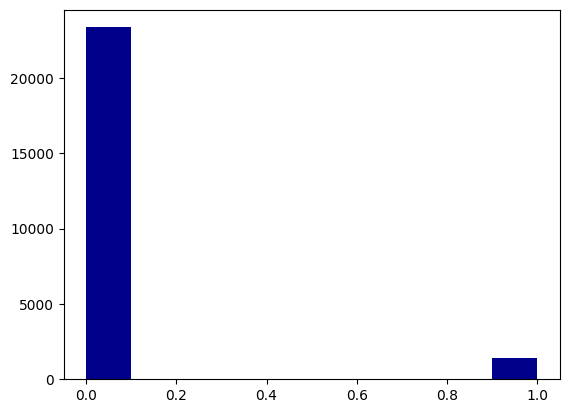

In [17]:
data['label'].hist(color='darkblue', grid=False)

Here, 0 = not hate speech, and 1 = hate speech

In [18]:
# Save cleaned tweet data file to disk 

data.to_csv("cleaned_data.csv")

# Add AAVE annotation to dataset

## Prepare dataset for training

In [3]:
aave_csv = pd.read_csv("/kaggle/input/dialect-samples/aave_samples.csv",header=None)
sae_csv = pd.read_csv("/kaggle/input/dialect-samples/sae_samples.csv",header=None)

aave_csv.rename(columns = {0:'text'},inplace = True)
sae_csv.rename(columns = {0:'text'},inplace = True)

In [4]:
aave_csv['aave'] = 1
sae_csv['aave'] = 0

In [5]:
aave_csv.head()

,text,aave
0,Sooo Manti Te'o was having a online/phone rela...,1
1,this lil girl aint going to win im the king of...,1
2,He up stairs rights now and I'm down here gett...,1
3,Shit I Am Who Am..Fresh up out of Apologize..I...,1
4,It's very rare that I get what I want. Now tha...,1


In [6]:
sae_csv.head()

,text,aave
0,Manti Te'o was having a relationship via telep...,0
1,The little girl is not going to win because i ...,0
2,He is upstairs rights now and I'm down here ge...,0
3,"Shit, I am who I am. I'm done apologizing. I'm...",0
4,"It is very rare that I get what I want, but no...",0


In [7]:
len(aave_csv), len(sae_csv)

(2019, 2019)

In [8]:
dialect_data = pd.concat([aave_csv, sae_csv])
len(dialect_data)

4038

In [9]:
dialect_data.iloc[2015:2023]

,text,aave
2015,I love when you ad lip. If that's what you cal...,1
2016,ISO a nice place to do karaoke or DJ music tha...,1
2017,"Must be an establishment with a ""Grown Folks"" ...",1
2018,", so why i went to the store to get somethingg...",1
0,Manti Te'o was having a relationship via telep...,0
1,The little girl is not going to win because i ...,0
2,He is upstairs rights now and I'm down here ge...,0
3,"Shit, I am who I am. I'm done apologizing. I'm...",0


In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing with 'aave' as the target label
X_train, X_test, y_train, y_test = train_test_split(dialect_data, dialect_data['aave'], 
                                                    test_size=0.2, random_state=42)

In [11]:
X_train

,text,aave
1610,The SPURS aren't hardly playing like they did ...,1
1941,Never understood why 7 make their standard jea...,1
1454,I’m watching the Auburn and OleMiss game from ...,0
1169,I'm laughing; I've been trying for about three...,0
1538,Anyone ISO a DJ for Sunday Father's Day? I'm a...,1
...,...,...
1130,"haha I'm 23, its not forbidden to say for us. ...",1
1294,Don't invite me over your house if you don't h...,1
860,kicking it where tho. I'm confused and bish yo...,1
1488,Why are they talking about John Cena during th...,0


In [34]:
X_test

,text,aave
1118,I hate you white acting degree fellow African ...,0
149,I didnt speak on Lillard cuz i made no referen...,1
4,"It is very rare that I get what I want, but no...",0
427,"Just because you want to be friends with me, d...",0
1181,I didn’t ask seven. I figured she wasn’t inter...,0
...,...,...
436,Why is it! 1:30am and you paid for VIP parking...,1
1449,"Do not look at my forehead, chest, or behind m...",0
1615,"Damn, I'm tired. I'm glad I only have to work ...",0
1112,It depends on how you meet me. I simply do not...,0


## Tokenize the data

In [56]:
!pip uninstall tensorflow --y

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [57]:
!pip install tensorflow==2.8.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl.metadata (2.9 kB)
Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow-decision-forests 1.8.1 requires tensorflow~=2.15.0, but you have tensorflow 2.8.0 which is incompatible.
tensorflow-serving-api 2.14.1 requires tensorflow<3,>=2.14.1, but you have tensorflow 2.8.0 which is incompatible.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.8.0 which is incompatible.


In [58]:
import tensorflow as tf

In [59]:
print(tf.__version__)

2.15.0


In [44]:
import torch
import transformers
from torch.utils.data import Dataset, DataLoader

In [46]:
from transformers import DistilBertTokenizerFast

# Instantiate DistilBERT tokenizer... using the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [47]:
# Set the maximum number of words to tokenize (DistilBERT can tokenize up to 512)
MAX_LENGTH = 128


# Function to encode text data in batches
def batch_encode(tokenizer, texts, batch_size=128, max_length=MAX_LENGTH):
    """""""""
    A function that encodes a batch of texts and returns the texts'
    corresponding encodings and attention masks that are ready to be fed 
    into a pre-trained transformer model.
    
    Input:
        - tokenizer:   Tokenizer object from the PreTrainedTokenizer Class
        - texts:       List of strings where each string represents a text
        - batch_size:  Integer controlling number of texts in a batch
        - max_length:  Integer controlling max number of words to tokenize in a given text
    Output:
        - input_ids:       sequence of texts encoded as a tf.Tensor object
        - attention_mask:  the texts' attention mask encoded as a tf.Tensor object
    """""""""
    
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
#                                              padding='longest', # implements dynamic padding
                                             padding='max_length',
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs['input_ids'])
        attention_mask.extend(inputs['attention_mask'])
    
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [48]:
train_texts = X_train['text'].to_list()
test_texts = X_test['text'].to_list()


# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, train_texts)

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, test_texts)

In [49]:
X_train_ids  # Words of the sample text encoded as sequences of numbers

<tf.Tensor: shape=(3230, 128), dtype=int32, numpy=
array([[  101,  1996, 18205, ...,     0,     0,     0],
       [  101,  2196,  5319, ...,     0,     0,     0],
       [  101,  1045,  1521, ...,     0,     0,     0],
       ...,
       [  101, 10209,  2009, ...,     0,     0,     0],
       [  101,  2339,  2024, ...,     0,     0,     0],
       [  101,  1996,  2069, ...,     0,     0,     0]], dtype=int32)>

In [50]:
X_train_attention  # Binary sequence telling the model which numbers in input_ids to pay attention to and which to ignore

<tf.Tensor: shape=(3230, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

## Initializing the base model

In [51]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Make DistilBERT layers untrainable
for layer in distilBERT.layers:
    layer.trainable = False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


## Adding a classification head 

In [52]:
MAX_LENGTH = 128
LAYER_DROPOUT = 0.2
LEARNING_RATE = 5e-5
RANDOM_STATE = 42

In [53]:
def build_model(transformer, max_length=MAX_LENGTH):
    '''
    Template for building a model off of the BERT or DistilBERT architecture
    for a binary classification task.
    
    Input:
      - transformer:  a base Hugging Face transformer model object (BERT or DistilBERT)
                      with no added classification head attached.
      - max_length:   integer controlling the maximum number of encoded tokens 
                      in a given sequence.
    
    Output:
      - model:        a compiled tf.keras.Model with added classification layers 
                      on top of the base pre-trained model architecture.
    '''
    
    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='input_attention', 
                                                  dtype='int32')
#     # Convert Keras tensors to TensorFlow tensors
#     input_ids = tf.convert_to_tensor(input_ids_layer)
#     input_attention = tf.convert_to_tensor(input_attention_layer)
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, 
    # which is located at index 0 of every encoded sequence.  
    # Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    # Define a single node that makes up the output layer (for binary classification)
    output = tf.keras.layers.Dense(1, 
                                   activation='sigmoid',
                                   kernel_initializer=weight_initializer,  
                                   kernel_constraint=None,
                                   bias_initializer='zeros'
                                   )(cls_token)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
                  loss=focal_loss(),
                  metrics=['accuracy'])
    
    return model

In [ ]:
model = build_model(distilBERT)

## Training classification layer weights

In [25]:
len(X_train.index)

3230

In [26]:
y_train.to_numpy()

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
EPOCHS = 5
BATCH_SIZE = 64
NUM_STEPS = len(X_train.index)

# Train the model
train_history1 = distilBERT.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    steps_per_epoch = NUM_STEPS,
#     validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=2
)